In [23]:
import pandas as pd
from pandas import DataFrame as df

In [24]:
dat = pd.read_csv('hour.csv')
dat

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### Removing target columns and date-day

In [25]:
dat_nodate = dat.drop(['dteday', 'registered', 'casual', 'cnt'], axis=1)

### Finding variance in all columns

In [26]:
## Season is redundant given month and same goes for instant and hr
# dat_nodate = dat_nodate.drop(['season', 'instant', 'yr'], axis=1)

In [27]:
vars = dat_nodate.var().sort_values(ascending=False)
vars

instant       2.517058e+07
hr            4.780900e+01
mnth          1.182518e+01
weekday       4.023119e+00
season        1.225268e+00
weathersit    4.087772e-01
yr            2.500078e-01
workingday    2.166257e-01
hum           3.722192e-02
temp          3.707786e-02
atemp         2.953250e-02
holiday       2.794423e-02
windspeed     1.496713e-02
dtype: float64

### Finding correlation with target variable

In [28]:
corrs = dat_nodate.apply(lambda x: x.corr(dat.cnt)).abs().sort_values(ascending=False)
corrs

temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
dtype: float64

In [29]:
corrs_sort = corrs.abs().sort_values(ascending=False)
corrs_sort

temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
dtype: float64

#### Get columns that correlate more with the target variable

In [30]:
sel_cols = vars[:]
sel_col_names = sel_cols.keys().tolist()

In [31]:
sel_dat = dat[sel_col_names]
sel_dat

,instant,hr,mnth,weekday,season,weathersit,yr,workingday,hum,temp,atemp,holiday,windspeed
0,1,0,1,6,1,1,0,0,0.81,0.24,0.2879,0,0.0000
1,2,1,1,6,1,1,0,0,0.80,0.22,0.2727,0,0.0000
2,3,2,1,6,1,1,0,0,0.80,0.22,0.2727,0,0.0000
3,4,3,1,6,1,1,0,0,0.75,0.24,0.2879,0,0.0000
4,5,4,1,6,1,1,0,0,0.75,0.24,0.2879,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,19,12,1,1,2,1,1,0.60,0.26,0.2576,0,0.1642
17375,17376,20,12,1,1,2,1,1,0.60,0.26,0.2576,0,0.1642
17376,17377,21,12,1,1,1,1,1,0.60,0.26,0.2576,0,0.1642
17377,17378,22,12,1,1,1,1,1,0.56,0.26,0.2727,0,0.1343


#### Plotting output with respect to each input

In [32]:
from matplotlib import pyplot as plt


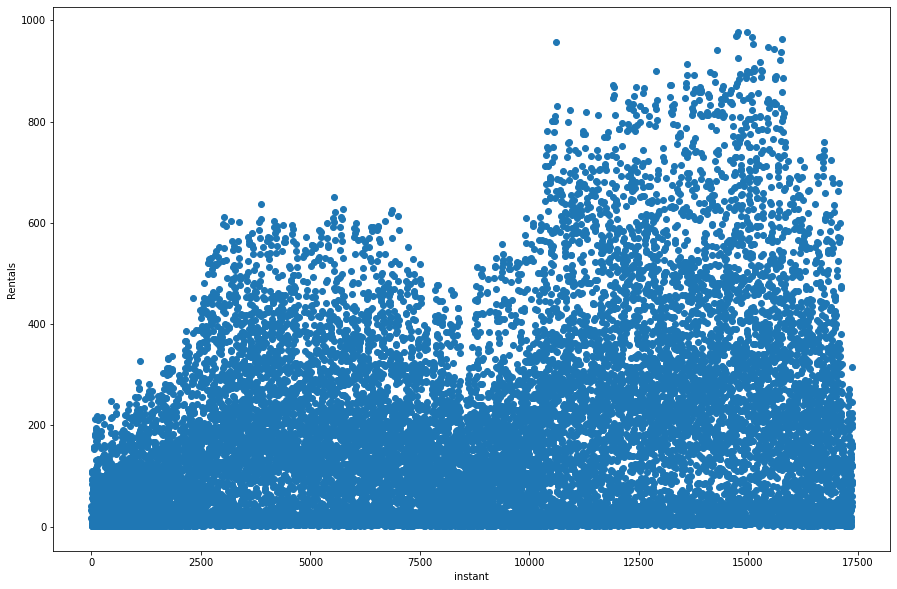

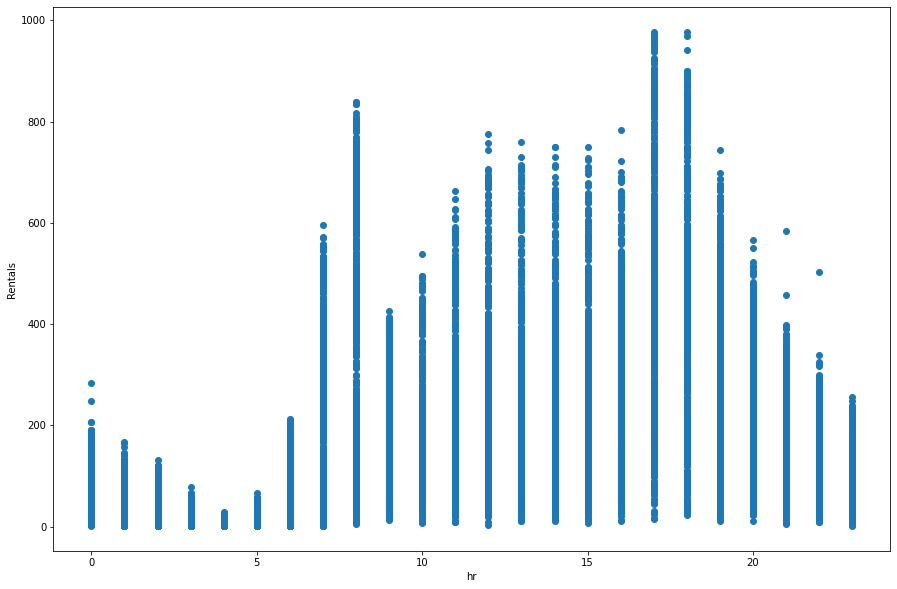

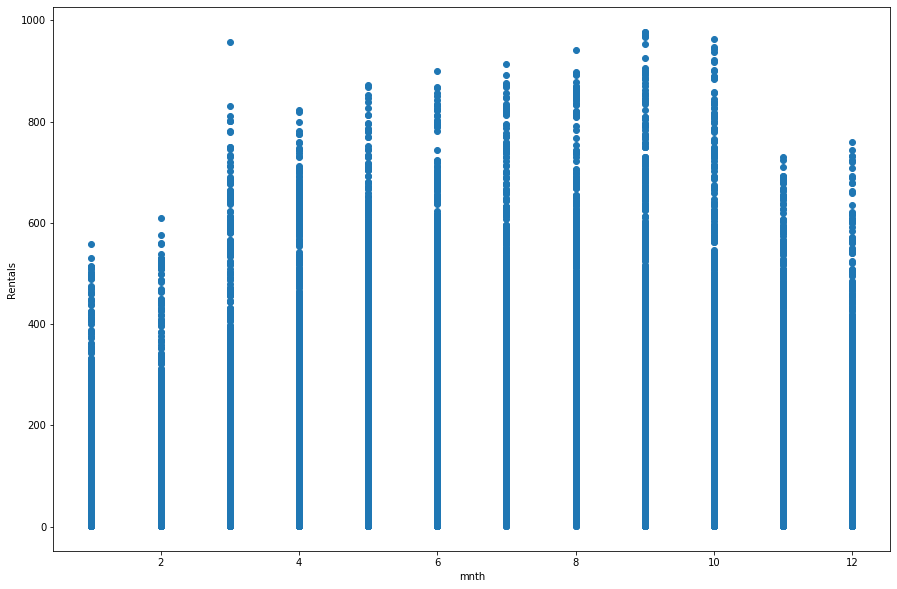

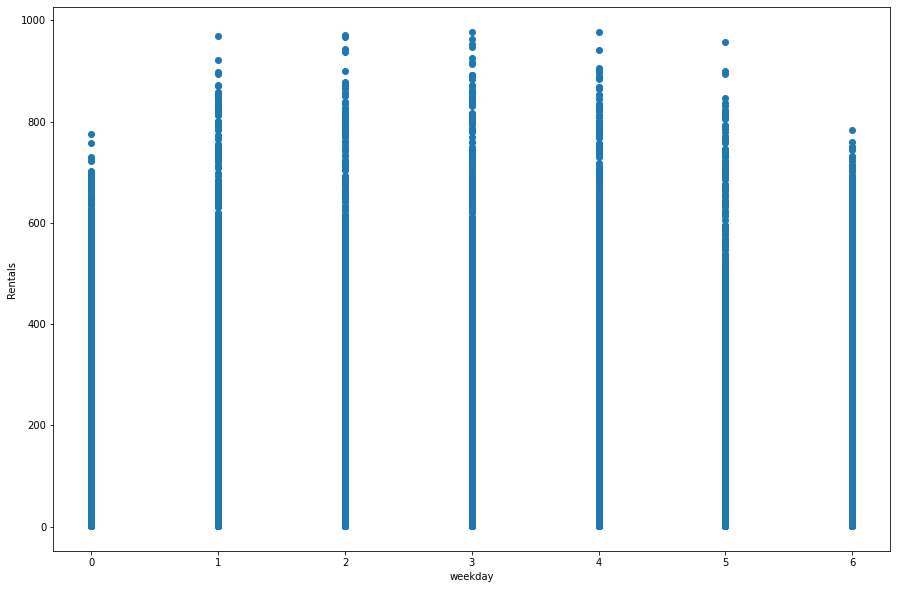

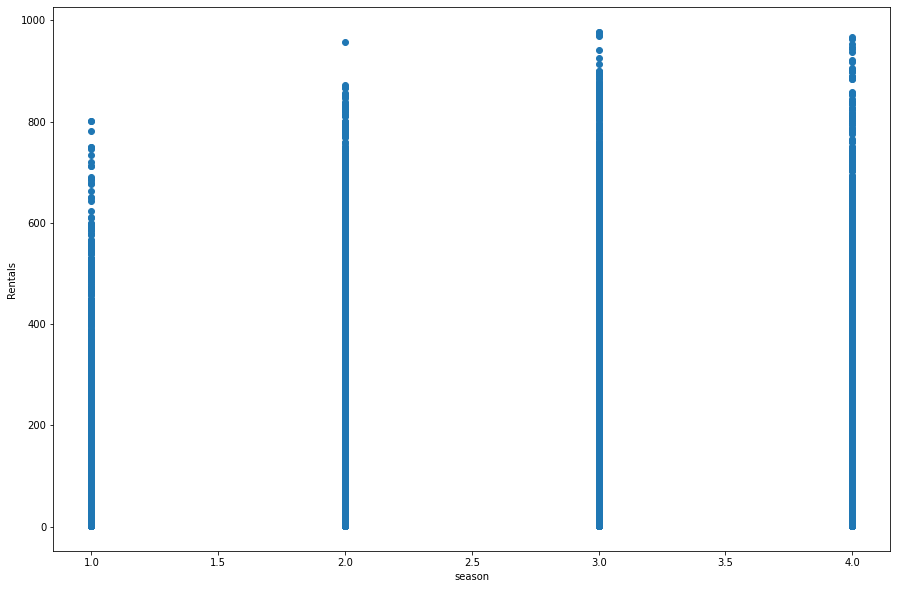

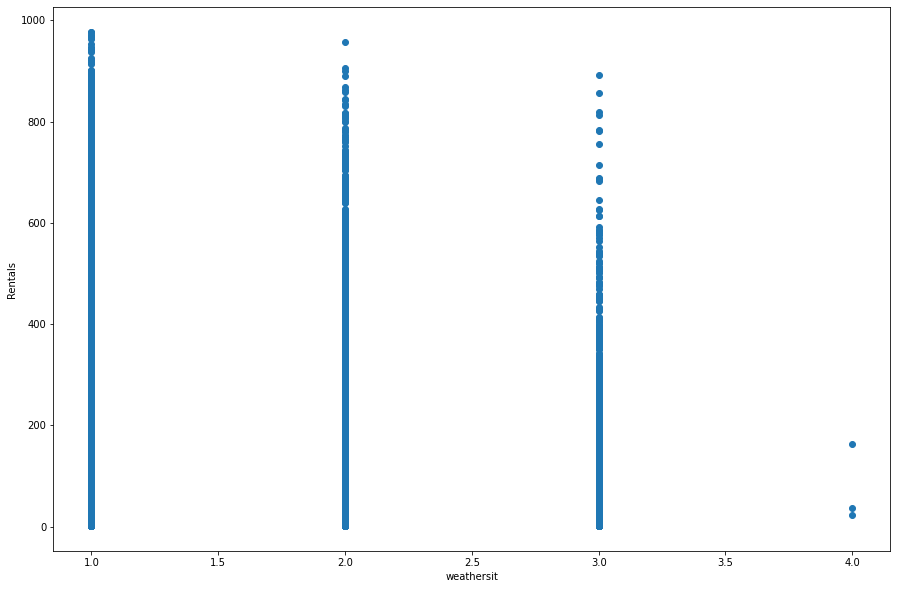

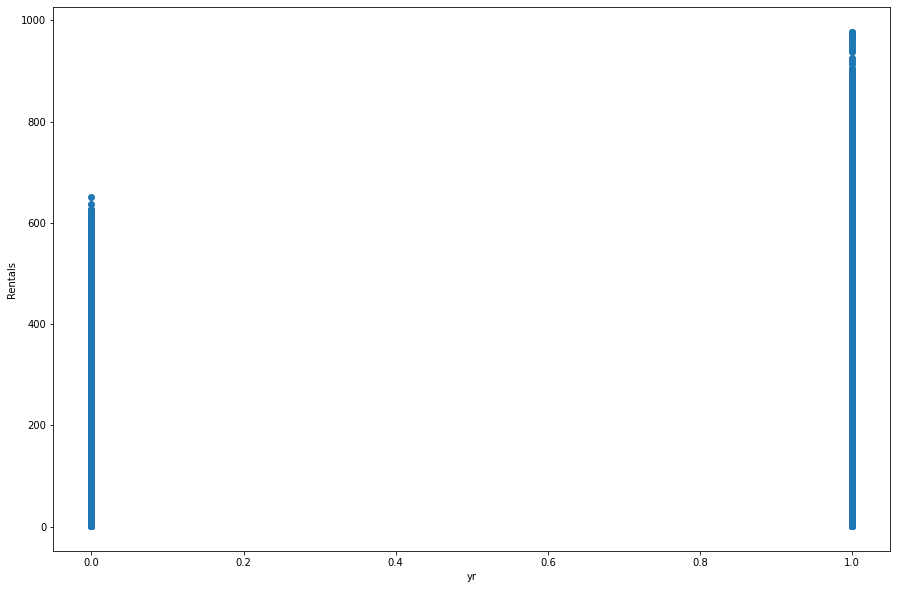

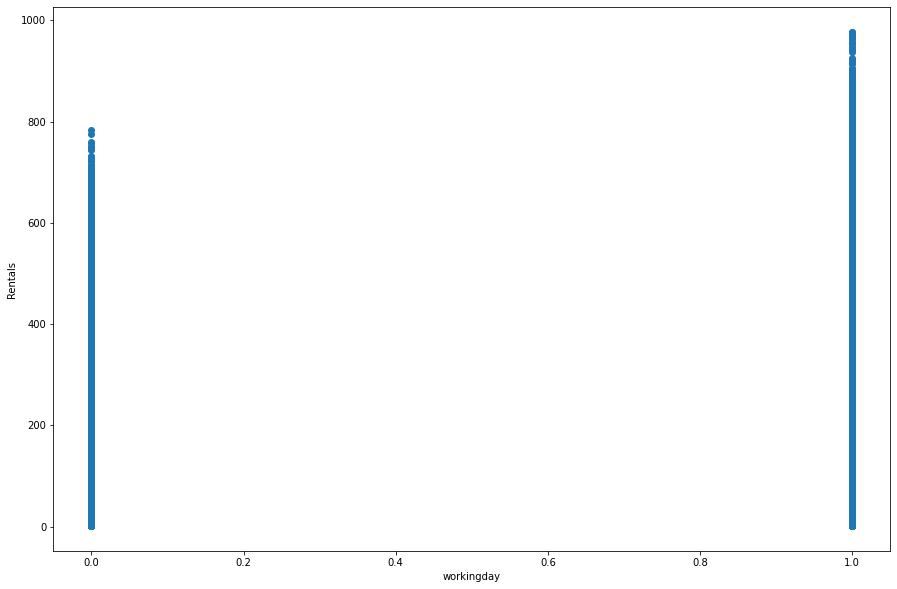

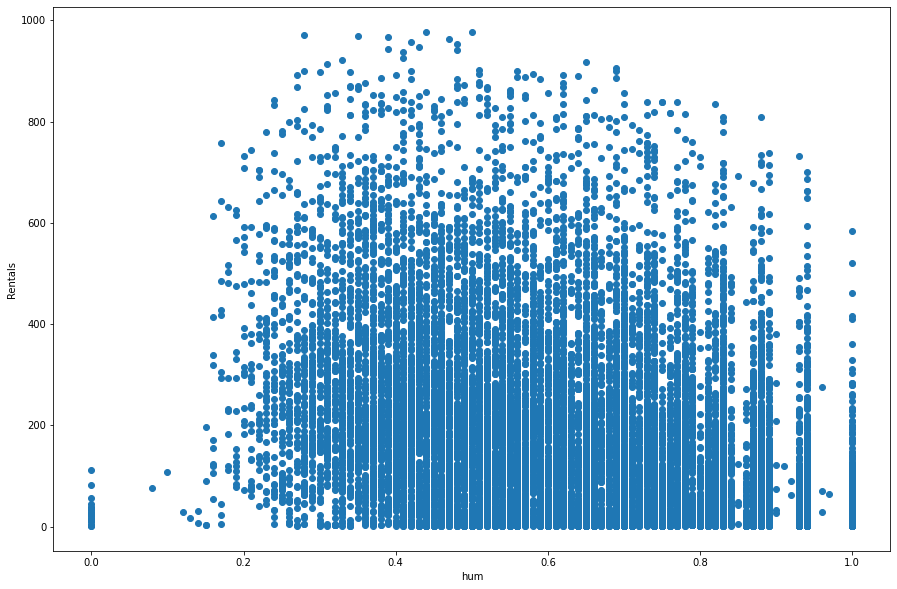

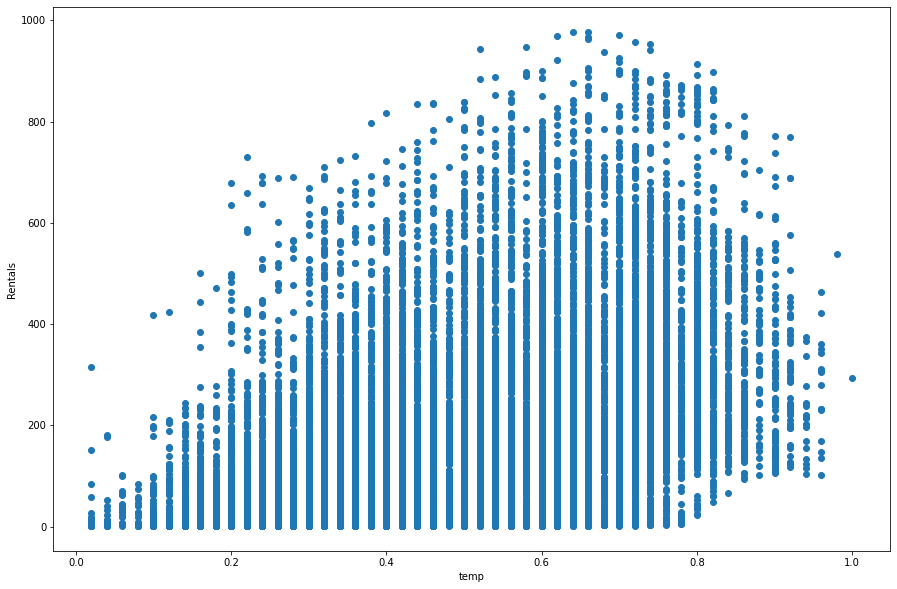

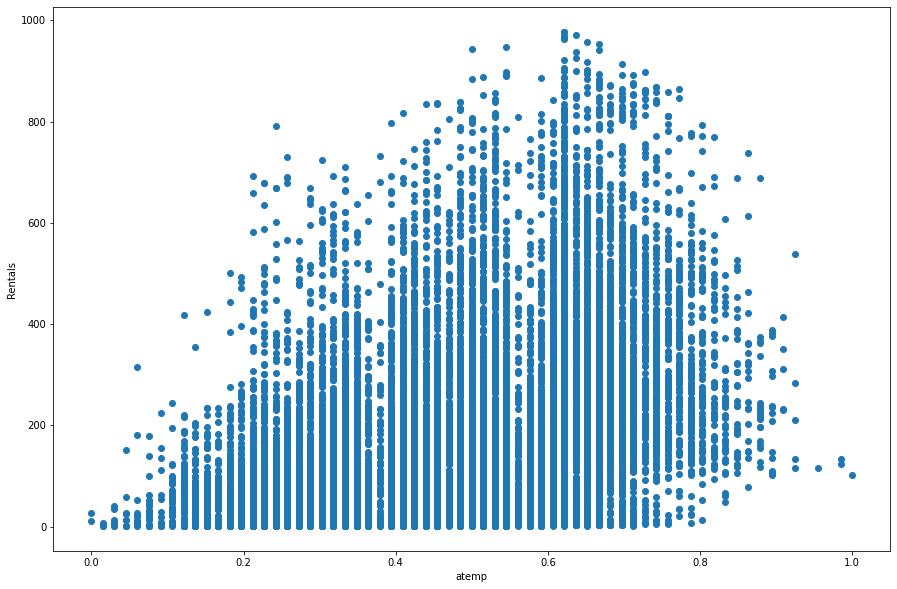

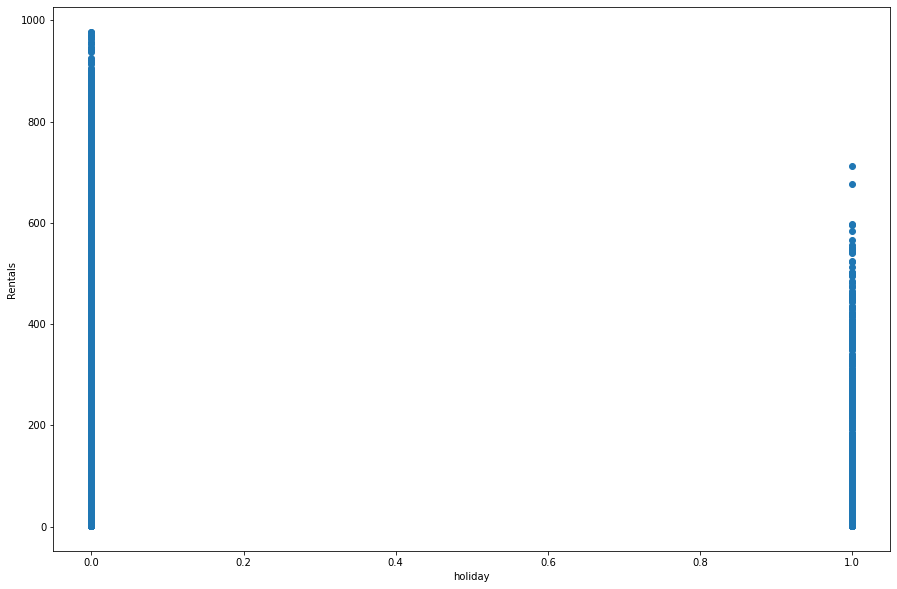

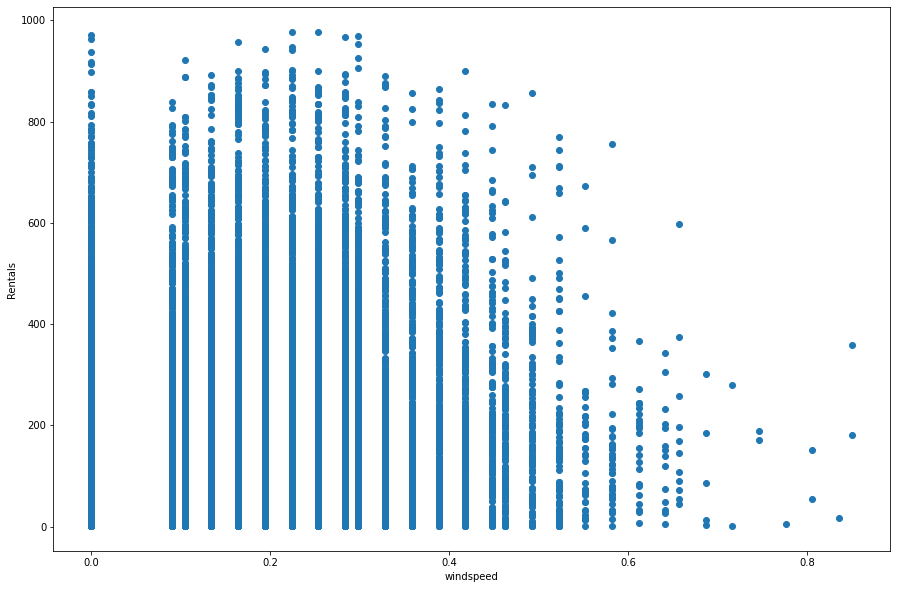

In [33]:
for col in sel_dat:
  plt.figure(figsize=(15,10))
  plt.scatter(sel_dat[col], dat['cnt'])
  plt.xlabel(col)
  plt.ylabel('Rentals')
plt.show()

## Training Polynomial Regression Model

In [34]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
import numpy as np

#### Data Normalization

In [35]:
sel_dat_norm = (sel_dat - sel_dat.mean()) / sel_dat.std()
sel_dat_norm

,instant,hr,mnth,weekday,season,weathersit,yr,workingday,hum,temp,atemp,holiday,windspeed
0,-1.731901,-1.669956,-1.610392,1.493848,-1.356595,-0.665174,-1.005105,-1.466858,0.947345,-1.334609,-1.093249,-0.172107,-1.553844
1,-1.731702,-1.525330,-1.610392,1.493848,-1.356595,-0.665174,-1.005105,-1.466858,0.895513,-1.438475,-1.181698,-0.172107,-1.553844
2,-1.731503,-1.380705,-1.610392,1.493848,-1.356595,-0.665174,-1.005105,-1.466858,0.895513,-1.438475,-1.181698,-0.172107,-1.553844
3,-1.731303,-1.236079,-1.610392,1.493848,-1.356595,-0.665174,-1.005105,-1.466858,0.636351,-1.334609,-1.093249,-0.172107,-1.553844
4,-1.731104,-1.091454,-1.610392,1.493848,-1.356595,-0.665174,-1.005105,-1.466858,0.636351,-1.334609,-1.093249,-0.172107,-1.553844
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.731104,1.077931,1.588421,-0.998959,-1.356595,0.898898,0.994863,0.681690,-0.141133,-1.230743,-1.269565,-0.172107,-0.211685
17375,1.731303,1.222556,1.588421,-0.998959,-1.356595,0.898898,0.994863,0.681690,-0.141133,-1.230743,-1.269565,-0.172107,-0.211685
17376,1.731503,1.367182,1.588421,-0.998959,-1.356595,-0.665174,0.994863,0.681690,-0.141133,-1.230743,-1.269565,-0.172107,-0.211685
17377,1.731702,1.511807,1.588421,-0.998959,-1.356595,-0.665174,0.994863,0.681690,-0.348463,-1.230743,-1.181698,-0.172107,-0.456086


In [36]:
comb_dat = sel_dat_norm.copy()
comb_dat['cnt'] = dat['cnt']
comb_dat

,instant,hr,mnth,weekday,season,weathersit,yr,workingday,hum,temp,atemp,holiday,windspeed,cnt
0,-1.731901,-1.669956,-1.610392,1.493848,-1.356595,-0.665174,-1.005105,-1.466858,0.947345,-1.334609,-1.093249,-0.172107,-1.553844,16
1,-1.731702,-1.525330,-1.610392,1.493848,-1.356595,-0.665174,-1.005105,-1.466858,0.895513,-1.438475,-1.181698,-0.172107,-1.553844,40
2,-1.731503,-1.380705,-1.610392,1.493848,-1.356595,-0.665174,-1.005105,-1.466858,0.895513,-1.438475,-1.181698,-0.172107,-1.553844,32
3,-1.731303,-1.236079,-1.610392,1.493848,-1.356595,-0.665174,-1.005105,-1.466858,0.636351,-1.334609,-1.093249,-0.172107,-1.553844,13
4,-1.731104,-1.091454,-1.610392,1.493848,-1.356595,-0.665174,-1.005105,-1.466858,0.636351,-1.334609,-1.093249,-0.172107,-1.553844,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.731104,1.077931,1.588421,-0.998959,-1.356595,0.898898,0.994863,0.681690,-0.141133,-1.230743,-1.269565,-0.172107,-0.211685,119
17375,1.731303,1.222556,1.588421,-0.998959,-1.356595,0.898898,0.994863,0.681690,-0.141133,-1.230743,-1.269565,-0.172107,-0.211685,89
17376,1.731503,1.367182,1.588421,-0.998959,-1.356595,-0.665174,0.994863,0.681690,-0.141133,-1.230743,-1.269565,-0.172107,-0.211685,90
17377,1.731702,1.511807,1.588421,-0.998959,-1.356595,-0.665174,0.994863,0.681690,-0.348463,-1.230743,-1.181698,-0.172107,-0.456086,61


In [37]:
train_dat, test_dat = train_test_split(comb_dat, test_size=0.2)

#### Removing Outliers From Train Data

In [38]:
from scipy import stats
train_dat = train_dat[(np.abs(stats.zscore(train_dat)) < 3).all(axis=1)]

#### Fitting the data

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=4)  # Fitting 4th degree polynomial on input features
poly_variables = poly.fit_transform(train_dat.iloc[:, :-1].values)

# poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, train_dat['cnt'].values, test_size = 0.2, random_state = 42)
n_train = round(len(poly_variables)*0.8)
poly_var_train, poly_var_test, res_train, res_test = poly_variables[:n_train], poly_variables[n_train:], train_dat['cnt'].values[:n_train], train_dat['cnt'].values[n_train:]

regression = linear_model.LinearRegression()  # Linear Regression with the fitted polynomial

model = regression.fit(poly_var_train, res_train)
score = model.score(poly_var_test, res_test)
print("score : ", score)

score :  0.6256597329996632


In [40]:
score

0.6256597329996632

### Inference on Test Data

In [41]:
preds = model.predict(poly_var_test)
preds = np.around(preds).astype(np.int32).tolist()  # rounding off to integer values since bike rentals can only be integers
gt = res_test

##### Plotting first 100 values

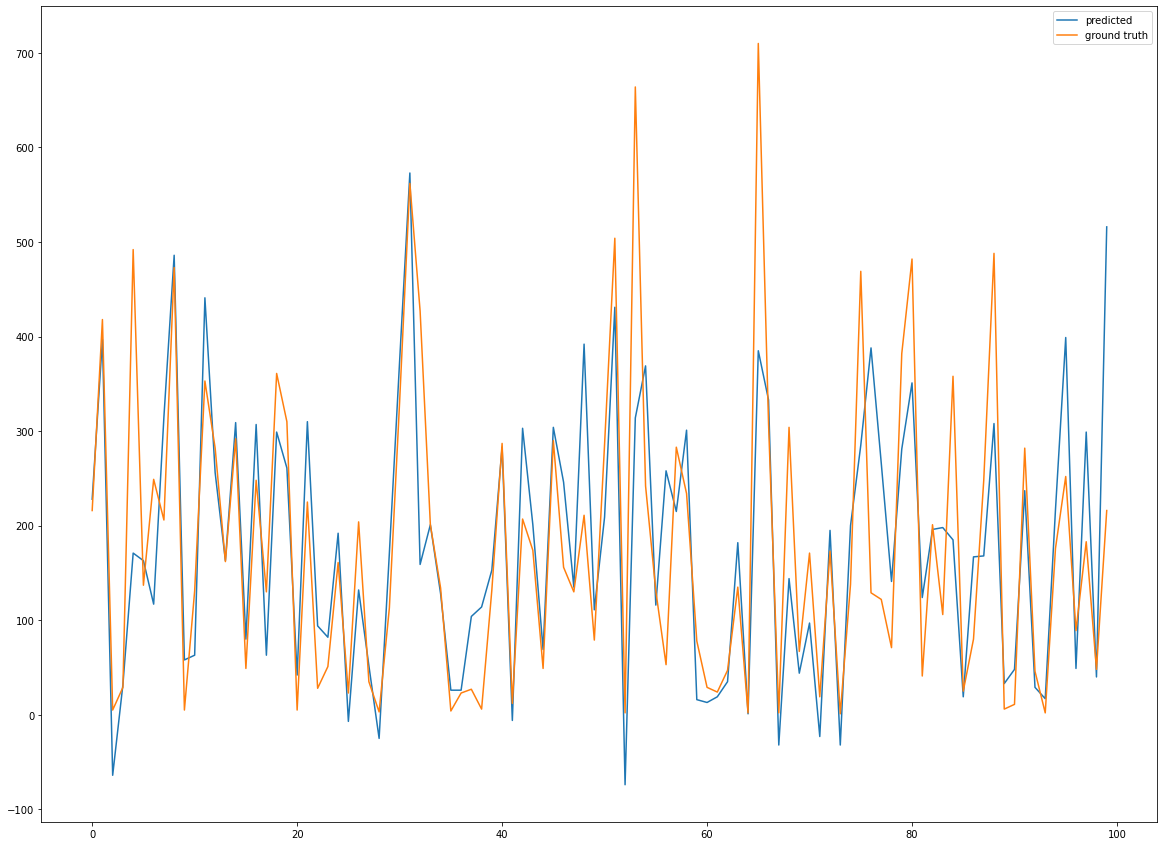

In [42]:
plt.figure(figsize=(20, 15))
plt.plot(range(100), preds[:100], label='predicted')
plt.plot(range(100), gt[:100], label='ground truth')
plt.legend()
plt.show()